In [2]:
# Import the numpy library for numerical operations
import numpy as np
# Import the matplotlib.pyplot module for plotting
import matplotlib.pyplot as plt
# Import the math module for mathematical functions
import math,cmath
from scipy import integrate
from scipy.special import jv,yv,j1

In [3]:
# 定义一个变量f0，其值为2.25乘以10的6次方，代表频率
f0 = 4e6
# 定义一个变量c0，其值为1500.0，代表声速
c0 = 1500.0
# 定义一个变量u，其值为1.0乘以10的3次方，代表质点速度
u = 1.0e3
# 定义一个变量p，其值为1.0乘以10的3次方，代表声压
p = 1.0e3
# 计算角频率w，公式为2乘以π乘以频率f0
w = 2 * math.pi * f0
# 计算波长lamd，公式为声速c0除以频率f0
lamd = c0 / f0
# 计算波数k，公式为2乘以π除以波长lamd
k = 2 * math.pi / lamd


In [4]:
# 计算 L 的值，L 为 lamd 的四分之一
L = lamd/4
# 定义变量 a，其值为 10 毫米（转换为国际单位制）
a = 10e-3
# 定义变量 r，其值为 5 毫米（转换为国际单位制）
r = 5e-3
# 定义变量 F，其值为 5 毫米（转换为国际单位制）
F=5e-3
# 定义内半径 Rin，其值为 2 毫米（转换为国际单位制）
Rin = 2e-3
# 定义外半径 Rout，其值为 3 毫米（转换为国际单位制）
Rout = 3e-3


In [5]:
def Jf(a,xita):
    tmp = 2*j1(k*a*math.sin(xita))
    ret = tmp/(k*a*math.sin(xita))
    return ret

In [6]:
Jf(a,1e-5),2*j1(k*a*math.sin(1e-5))/(k*a*math.sin(1e-5))

(np.float64(0.9999996490807735), np.float64(0.9999996490807735))

In [7]:
cmath.exp(complex(0, 1) * math.pi / 2)

(6.123233995736766e-17+1j)

In [8]:
def SoundPower(r,Rin,Rout,xita,t):
    t1 = w*p*u/r
    t2 = Rout**2*Jf(Rout,xita)
    t3 = Rin**2*Jf(Rin,xita)
    t4 = cmath.exp(complex(0,1)*(w*t-k*r))
    print(t1,t2,t3,t4)
    return np.absolute(t1*(t2-t3)*t4)

In [9]:
xita = np.arange(-np.pi/2, np.pi/2, np.pi/1000)
len(xita)

1000

In [10]:
y1 = np.zeros(len(xita))
y2 = np.zeros(len(xita))
y3 = np.zeros(len(xita))
for i in np.arange(0,len(xita)):
    y1[i] = SoundPower(3e-3,1.5e-3,3e-3,xita[i],c0/f0)
    y2[i] = SoundPower(3e-3,2e-3,3e-3,xita[i],c0/f0)
    y3[i] = SoundPower(3e-3,2.5e-3,3e-3,xita[i],c0/f0)

8377580409572781.0 -2.8285331380606752e-08 -1.9853332194248053e-08 (1-3.370128954351662e-13j)
8377580409572781.0 -2.8285331380606752e-08 3.188240235718424e-08 (1-3.370128954351662e-13j)
8377580409572781.0 -2.8285331380606752e-08 -9.840391061143667e-09 (1-3.370128954351662e-13j)
8377580409572781.0 -2.8292660536438024e-08 -1.98560144297537e-08 (1-3.370128954351662e-13j)
8377580409572781.0 -2.8292660536438024e-08 3.188128873558161e-08 (1-3.370128954351662e-13j)
8377580409572781.0 -2.8292660536438024e-08 -9.83313688153375e-09 (1-3.370128954351662e-13j)
8377580409572781.0 -2.8314638135826348e-08 -1.9864059515294794e-08 (1-3.370128954351662e-13j)
8377580409572781.0 -2.8314638135826348e-08 3.1877942551925025e-08 (1-3.370128954351662e-13j)
8377580409572781.0 -2.8314638135826348e-08 -9.811371250213657e-09 (1-3.370128954351662e-13j)
8377580409572781.0 -2.8351234546479296e-08 -1.9877462585322655e-08 (1-3.370128954351662e-13j)
8377580409572781.0 -2.8351234546479296e-08 3.1872347850969054e-08 (1-3.

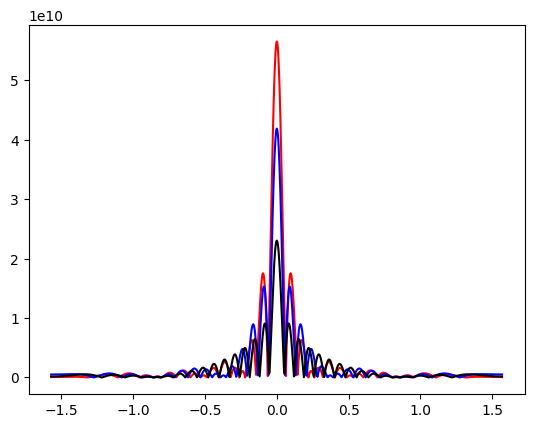

In [11]:
x = xita
plt.plot(x,y1,color='red')
plt.plot(x,y2,color='blue')
plt.plot(x,y3,color='black')

In [12]:
def AxisSoundPower(r,Rin,Rout,t):
    R1 = math.sqrt(Rout**2+r**2)
    R2 = math.sqrt(Rin**2+r**2)
    t1 = p*c0*u
    t2 = cmath.exp(complex(0,-1)*(k*R1))
    t3 = cmath.exp(complex(0,-1)*(k*R2))
    t4 = cmath.exp(complex(0,1)*(w*t))

    print(t1,t2,t3,t4)
    return np.absolute(t1*(t2-t3)*t4)
    

In [13]:
dis = np.arange(0, 1000*lamd, lamd/10)
len(dis)
 

10000

In [14]:
y1 = np.zeros(len(dis))
y2 = np.zeros(len(dis))
y3 = np.zeros(len(dis))
for i in np.arange(0,len(dis)):
    y1[i] = AxisSoundPower(dis[i],1e-3,3e-3,c0/f0)
    y2[i] = AxisSoundPower(dis[i],2e-3,3e-3,c0/f0)
    y3[i] = AxisSoundPower(dis[i],2.5e-3,3e-3,c0/f0)
    


1500000000.0 (1+1.959434878635765e-15j) (-0.5000000000000016+0.8660254037844377j) (1-5.09502586896226e-13j)
1500000000.0 (1+1.959434878635765e-15j) (-0.49999999999999684-0.8660254037844405j) (1-5.09502586896226e-13j)
1500000000.0 (1+1.959434878635765e-15j) (-0.4999999999999994+0.866025403784439j) (1-5.09502586896226e-13j)
1500000000.0 (0.9999922899838031-0.003926827338888407j) (-0.4897665256193298+0.8718536289898496j) (1-5.09502586896226e-13j)
1500000000.0 (0.9999922899838031-0.003926827338888407j) (-0.5050921600329588-0.8630654145968543j) (1-5.09502586896226e-13j)
1500000000.0 (0.9999922899838031-0.003926827338888407j) (-0.4959136450477137+0.8683718423898199j) (1-5.09502586896226e-13j)
1500000000.0 (0.999876671018165-0.015704864011897978j) (-0.458708275303671+0.8885869221229467j) (1-5.09502586896226e-13j)
1500000000.0 (0.999876671018165-0.015704864011897978j) (-0.5202575007655407-0.8540094454379258j) (1-5.09502586896226e-13j)
1500000000.0 (0.999876671018165-0.015704864011897978j) (-0.

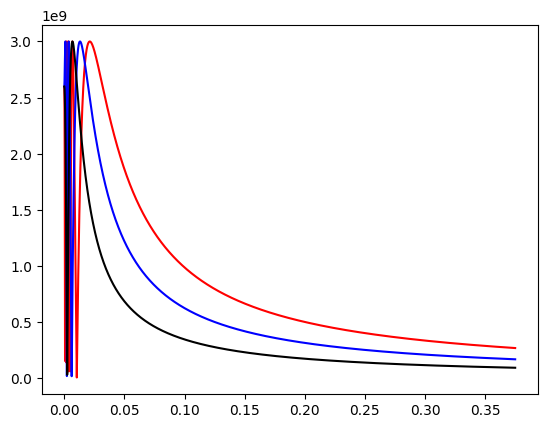

In [15]:
x = dis
plt.plot(x,y1,color='red')
plt.plot(x,y2,color='blue')
plt.plot(x,y3,color='black') 